In [24]:
import networker.io as nio
from networker.classes.geograph import GeoGraph
from networker import utils
%matplotlib inline

left_coords = [[0, 0], [100, 0], [200, 50]]
left_edges = [(0, 1), (1, 2)]
right_coords = [[0, 10], [50, 50]]

# create geographs and assign node attributes
left = GeoGraph(coords=left_coords, data=left_edges)
left.node = {node: {'name': ("L%s" % node)} for node in range(3)}
right = GeoGraph(coords=right_coords)
right.node = {node: {'name': ("R%s" % node)} for node in range(2)}

print("left geograph nodes:  %s" % len(left.nodes()))
print("right geograph nodes:  %s" % len(right.nodes()))

left geograph nodes:  3
right geograph nodes:  2


unioned_disjoint nodes:  5


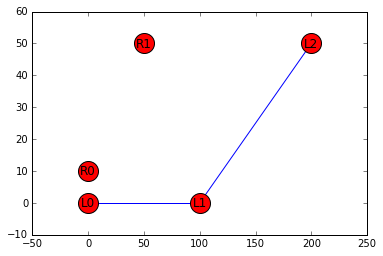

In [25]:
# union the left and right graphs forcing them to be disjoint prior
# to the union (so the 3 nodes in left and 2 nodes in right should result in 5)
unioned_disjoint = GeoGraph.compose(left, right, force_disjoint=True)

print("unioned_disjoint nodes:  %s" % len(unioned_disjoint.nodes()))
utils.draw_geograph(unioned_disjoint, node_label_field="name", node_size=400)

unioned nodes:  3


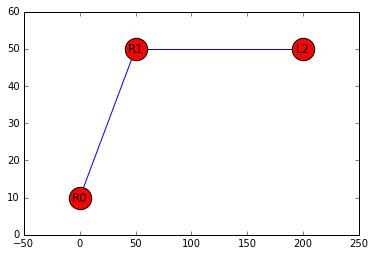

In [22]:
# union the graphs without forcing them to be disjoint first
# nodes 0 and 1 from left are merged with nodes 0 and 1 from right
# and the right nodes attributes/coordinates take precedence
unioned = GeoGraph.compose(left, right)

print("unioned nodes:  %s" % len(unioned.nodes()))
utils.draw_geograph(unioned, node_label_field="name", node_size=500)

disjoint merged nodes:  4


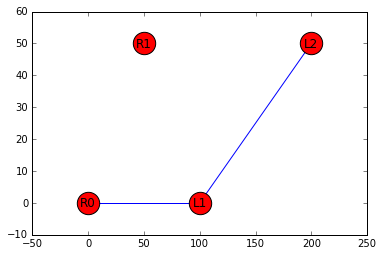

In [23]:
# now merge the nodes from the disjoint graph based on a proximity
# radius and see that L0 and R0 are merged (with R0 attributes taking precedence)
disjoint_merged = GeoGraph.compose(left, right, force_disjoint=True)
disjoint_merged.merge_nearby_nodes(radius=10)

print("disjoint merged nodes:  %s" % len(disjoint_merged.nodes()))
utils.draw_geograph(disjoint_merged, node_label_field="name", node_size=500)